### Load data

Importing BRAVA data...
...reading pickle...
... data imported
      V-LVDT    H-LVDT  SHEAR STRESS  NORMAL STRESS  ON BOARD LVDT  \
57 -5.118924  0.931722      0.389475       0.430739    2270.498332   
58 -5.113578  0.823280      0.378815       0.413398    2264.966265   
59 -5.118549  0.911243      0.359902       0.408924    2270.352703   
60 -5.113818  0.814889      0.337245       0.418758    2265.031800   
61 -5.119211  0.916838      0.327890       0.431029    2270.285230   

    V Load aux         TIME  NORMALISED SHEAR  LVDT NO JUMPS  LVDT VELOCITY  
57    0.474930  5000.570011          0.389747    2270.498332       0.568585  
58    0.475324  5000.580011          0.379087    2264.966265       0.621010  
59    0.475885  5000.590012          0.360174    2270.352703       0.568682  
60    0.475668  5000.600012          0.337517    2265.031800       0.601642  
61    0.475467  5000.610012          0.328162    2270.285230       0.565673  


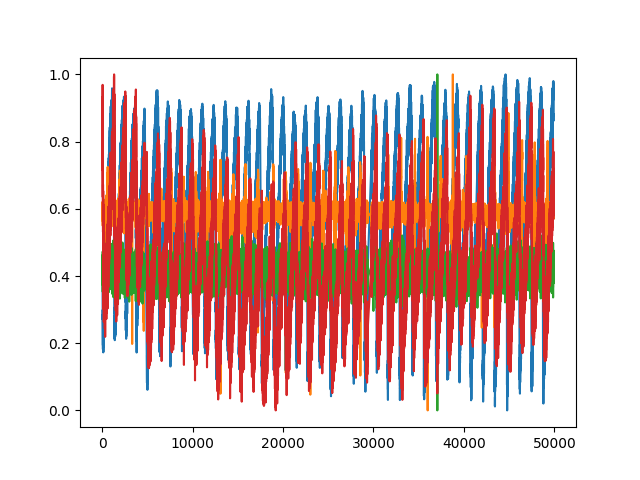

In [10]:
# IMPORTS
import matplotlib.pyplot as plt
from utils.load_utils import import_brava_data, normalise_columns


# JUPYTER
%matplotlib widget
%reload_ext autoreload
%autoreload 2

# LOAD DATA FROM PICKLE
datapath = "./data/b1383.txt"
picklepath = "./data/b1383_clipped_100hz.pickle"
data = import_brava_data(datapath, picklepath, downsample_factor=10, t_start=5000, t_end=5500, LVDT_readjustments=None, LVDT_method="negativevelocity")
data = data.dropna()
data = normalise_columns(data, ["SHEAR STRESS", "NORMAL STRESS", "LVDT VELOCITY", "H-LVDT"])

# PLOT DATA
print(data.head())
plt.close("all")
plt.plot(data["SHEAR STRESS"])
plt.plot(data["LVDT VELOCITY"])
plt.plot(data["NORMAL STRESS"])
plt.plot(data["H-LVDT"])
plt.show()

### Compute Exceedances

In [11]:
from pypardi.local_indices import compute_exceeds
X = data[["SHEAR STRESS", "LVDT VELOCITY", "NORMAL STRESS", "H-LVDT"]].to_numpy()
dist, exceeds, exceeds_idx, exceeds_bool, exp_stat = compute_exceeds(X, "./results/13", "b1382_clipped", save_full=True)

Computing pairwise_distances using 1 threads...
